<a href="https://colab.research.google.com/github/rajatpal00/Airline-passenger-referral-prediction/blob/main/Rajat_Pal_Capstone_Project_Airline_passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset discription
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.
Feature descriptions briefly as follows:
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review
* customer review: Review of the customers in free text format
 
* aircraft: Type of the aircraft
* traveller type: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight
* date flown: Flight date
* seat comfort: Rated between 1-5
* cabin service: Rated between 1-5
* food bev: Rated between 1-5
* entertainment: Rated between 1-5
* ground service: Rated between 1-5
* value for money: Rated between 1-5

##The main objective is to predict whether passengers will refer the airline to their friends.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
main_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/capstone project/Airline Passenger Referral Prediction/data_airline_reviews.xlsx') 

In [3]:
main_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
main_df.dropna(how='all',inplace=True)        # droping the rows which have all values as NaN
# main_df.reset_index(inplace=True)             # reseting the index
# main_df.drop('index',axis=1,inplace=True)     # droping index columns

###Duplicate values

In [5]:
#counting number of duplicate values
main_df.duplicated().sum()

4764

In [6]:
#droping duplicate rows
main_df.drop_duplicates(inplace=True)

In [7]:
main_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##EDA

In [8]:
main_df.shape

(61183, 17)

In [9]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

Checking for NaN count of each features

In [10]:
main_df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

### Checking for Imbalance in dataset

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


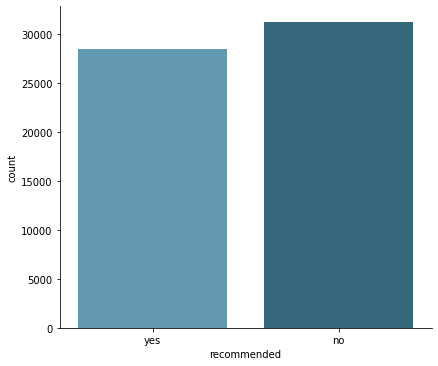

In [11]:
sns.factorplot(x="recommended", data=main_df, kind="count", size=5, aspect=1.2, palette="PuBuGn_d")
plt.show()

In [12]:
main_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Removing Non important features from dataset
* Author - It is the name of passenger and it doesn't matter
* Review date or flown date
* route - as route will not decide the experience of person on flight


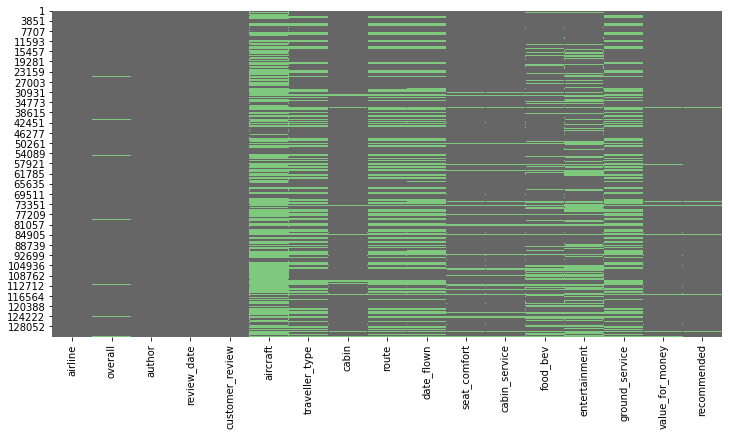

In [13]:
#ploting heatmap to see NaN values in each features
plt.figure(figsize=(12,6))
sns.heatmap(main_df.isna(),cbar=False,cmap='Accent_r')

As from heat map we can see that there are few features which have NaN values, it would be right decision to drop the features which have More that 60% values as NaN, as imputing them will only create baisness in the dataset

In [14]:
def null_percentage(name):
  'this function will collect all features which have nan vaalues more than 60%'
  drop_features =[]
  for i in name:
    null_value= main_df[i].isna().sum()
    if (null_value/len(main_df)) > 0.6:
      drop_features.append(i)

  return drop_features

In [15]:
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [16]:
droping_features= null_percentage(features)
droping_features


['aircraft']

In [17]:
main_df.drop(droping_features,axis=1,inplace=True)

Imptating dependent features

In [18]:
#no of nan values in recommeded column
main_df['recommended'].isna().sum()

1422

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


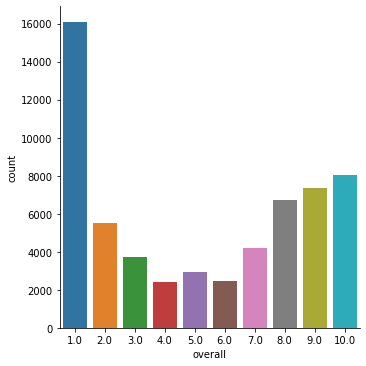

In [19]:
sns.factorplot(x='overall',data= main_df,kind='count')

In [22]:
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

overall


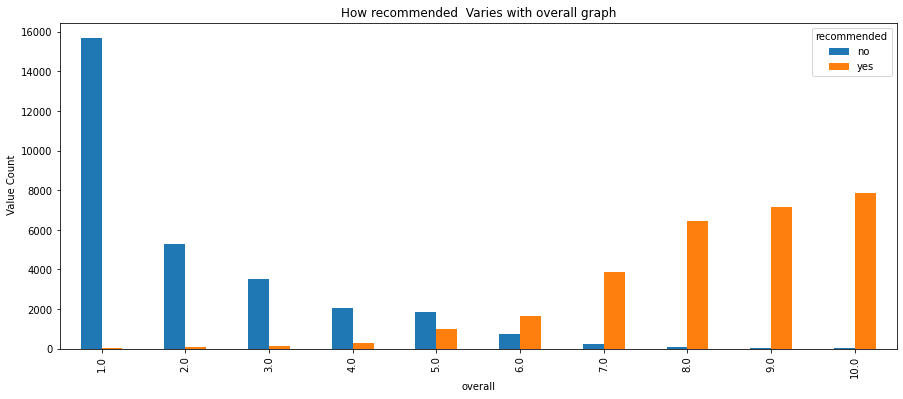

traveller_type


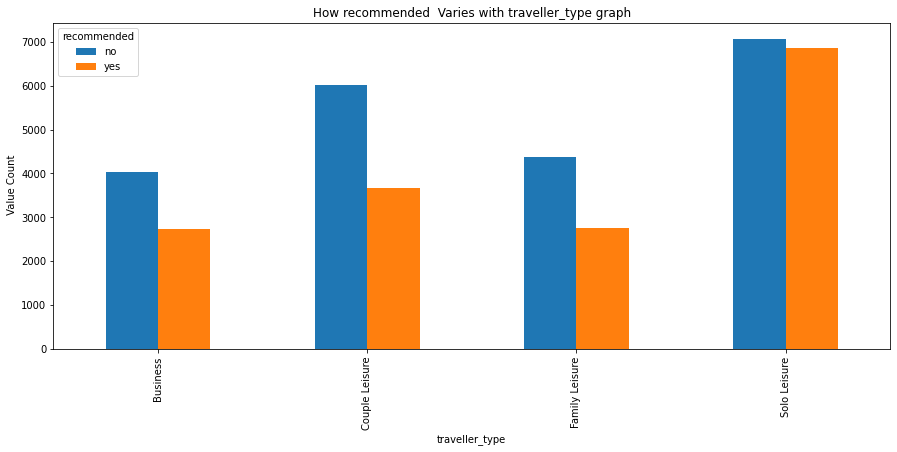

cabin


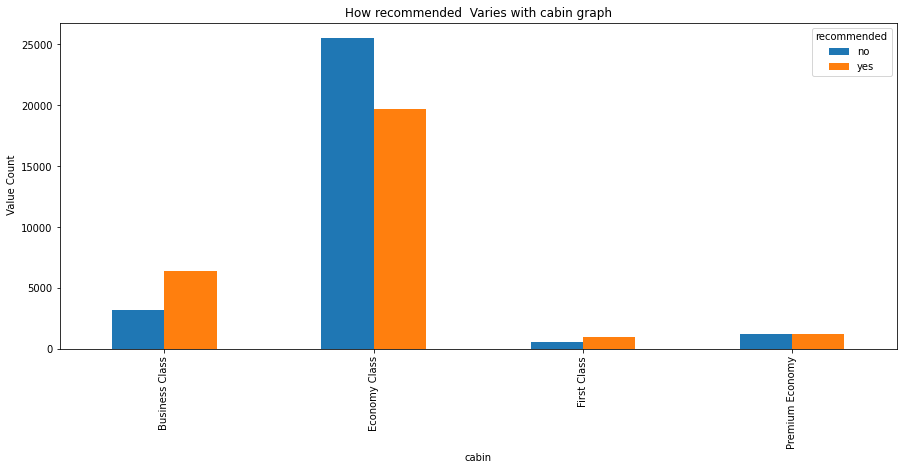

date_flown


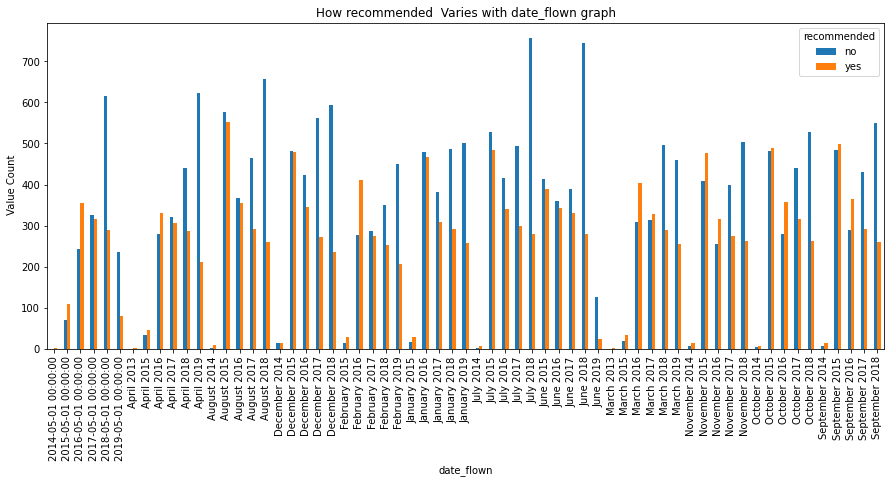

seat_comfort


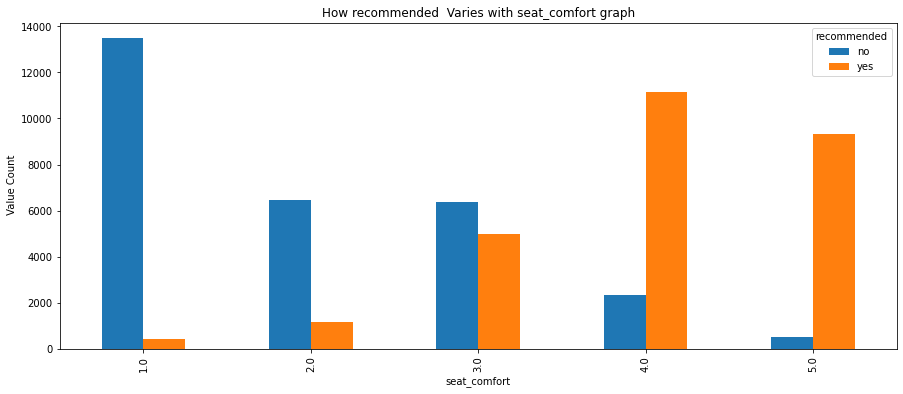

cabin_service


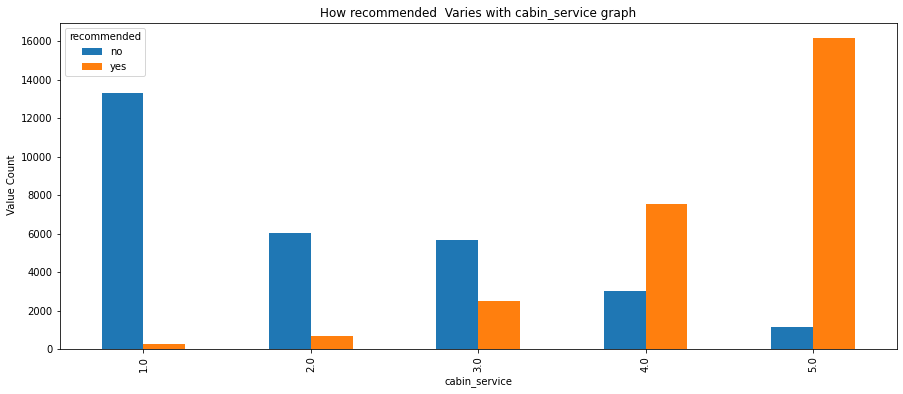

food_bev


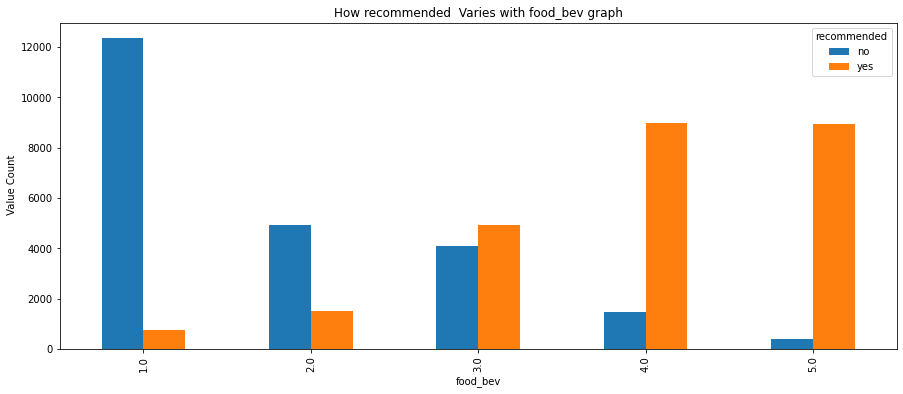

entertainment


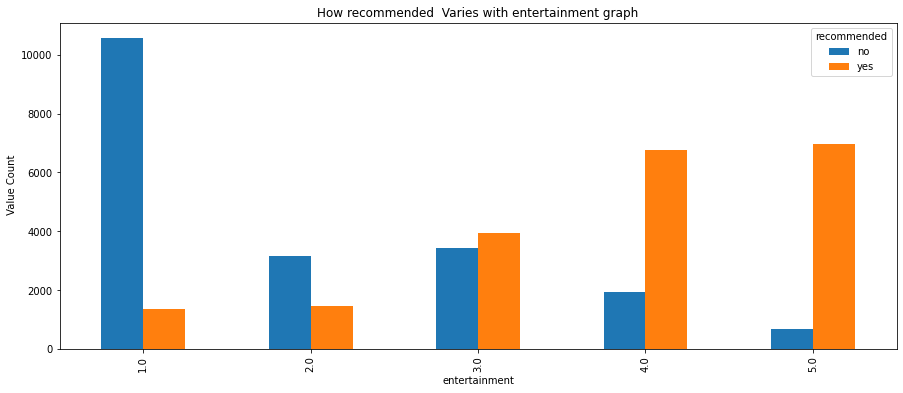

ground_service


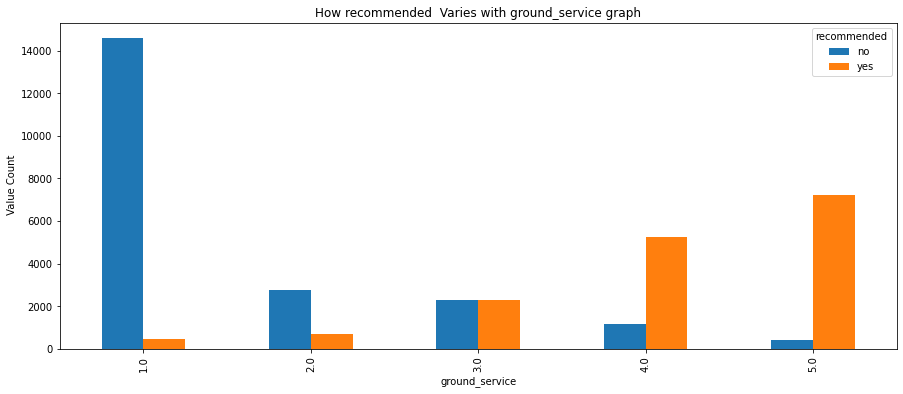

value_for_money


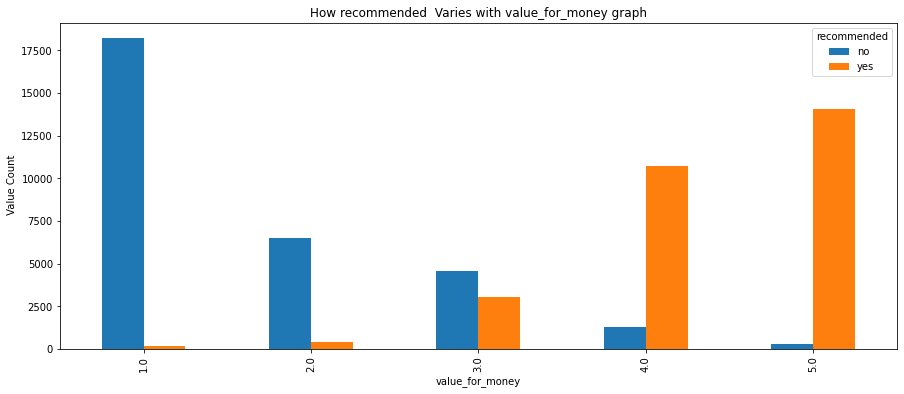

In [23]:
for feature in features_1:
  print(feature)
  main_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()


###Conclusion of above graphs

**Numerical Features**
* From all above graphs we can see that when a person have given higher rating then we have also recommended to the  friend.
* we can also see some anomilities where a person have given very low rating and still recommended and visa versa.

> Overall feature
 * So one thing we can be sure of that if a person have given an overall rating of less than 2 we wont be recommended.
 * whereas a person who have given a rating greater than 8 there are high chances that he will recommend.

**Categorical Features**
> Travel Type
 * The number of not recommended is higher in all the Travel type class
 but couple is one class where the diffrence is higher Where as solo class have minimun diffrence.
 * From above we can conclude that people travelling in groups face more problems than people travelling alone.

> Cabin
 * Economy class is most unsatisfied by the services provided by the airline, thats why majority of them are not recommending.




In [ ]:
anom = main_df[(main_df['overall']<=2) & (main_df['recommended']=='yes')]
anom

We can see there are fews rows in which the overall rating is low but people have given high rating in other features, so By this we can understand that these values are incorrect. 

In [ ]:
avg_df= main_df.copy()

In [ ]:
avg_df.columns

In [ ]:
avg_df

####When recommended is no 

Here we found all rows which have recommended as no and NaN values in all review columns

We will be replacing these NaN values whith 1

In [24]:

Nan_no = (main_df['overall'].isna()) & (main_df['recommended']=='no') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna())

In [25]:
# fill Nan values by 1
main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(1)

In [26]:
main_df.loc[Nan_no]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
13705,KLM Royal Dutch Airlines,1.0,Martin Webber,22nd October 2014,Having booked a series of long-haul Business C...,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
13775,KLM Royal Dutch Airlines,1.0,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
14435,Virgin America,1.0,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
23085,Delta Air Lines,1.0,Kyle Martin,10th December 2014,I have been flying Delta for years (several wi...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
23179,Delta Air Lines,1.0,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131888,Ukraine International,1.0,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131890,Ukraine International,1.0,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131892,Ukraine International,1.0,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no


#### When recommended is YES

The numerical features are having NaN values

Replacing those NaN values to a valid value on the bases of recommended column

In [27]:
Nan_yes=(main_df['overall'].isna()) & (main_df['recommended']=='yes') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna())

In [28]:
# fillinng Nan vaues by 10
main_df.loc[Nan_yes,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] =main_df.loc[Nan_yes,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(10)

### Replacing NaN values
In numerical features apart from overall feature to median values of respected features

In [29]:
main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].median())

In [40]:
main_df.isna().sum()

airline                0
overall                0
author                 0
review_date            0
customer_review        0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended         1422
Avg_num                0
dtype: int64

###Creating a Average column
which have avrg score of (all numerical features except overall)

In [31]:
main_df['Avg_num']= (main_df['seat_comfort']+ main_df['cabin_service']+ main_df['food_bev']+main_df['entertainment']+main_df['ground_service']+main_df['value_for_money'])//6

### Finding NaN in overall feature
We will be replacing all Nan values in overall feature by avg colummn

In [38]:
m=(main_df['overall'].isna())

In [39]:
main_df.loc[m,'overall']= main_df.loc[m,'Avg_num']*2

### finding anomaly in overall feature with respect to recommended

Finding overall values which are wrongly classified as (1,2) where there average is higher than 2.

Replacing these values as 2* avg_value



In [32]:
wrong_overall = (main_df['Avg_num']>2) & (main_df['recommended']=='yes') & (main_df['overall']<=2)

In [33]:
# replacing overall value to 2* avg value
main_df.loc[wrong_overall,'overall'] = main_df.loc[wrong_overall,'Avg_num']*2 

In [34]:
main_df[(main_df['overall']< 2) & (main_df['recommended']=='yes')]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Avg_num
1453,Turkish Airlines,1.0,Nagasaki Erico,28th February 2016,"25 hours before the departure, Turkish Airline...",Solo Leisure,Business Class,NRT to ARN via IST,February 2016,3.0,3.0,3.0,3.0,1.0,1.0,yes,2.0
1657,Turkish Airlines,1.0,T Tichelmann,4th January 2016,Dublin to Jakarta via Istanbul. A total shambl...,Solo Leisure,Business Class,DUB to CGK via IST,December 2015,1.0,2.0,2.0,1.0,1.0,2.0,yes,1.0
7231,Emirates,1.0,A Danal,22nd October 2016,âœ… Verified Review | I have been flying with ...,Business,Business Class,DXB to MAN,September 2016,4.0,1.0,3.0,1.0,5.0,1.0,yes,2.0
7235,Emirates,1.0,Richard Woodhead,21st October 2016,âœ… Verified Review | Bangkok to Hong Kong and...,Family Leisure,Economy Class,BKK to HKG,October 2016,3.0,2.0,1.0,4.0,2.0,4.0,yes,2.0
7359,Emirates,1.0,A Anderson,9th August 2016,âœ… Verified Review | The car arrived at our S...,Couple Leisure,Business Class,SIN to GLA via DXB,August 2016,1.0,1.0,2.0,2.0,1.0,1.0,yes,1.0
10449,Lufthansa,1.0,T Eldem,10th January 2017,âœ… Verified Review | Ankara to Munich on Luft...,Family Leisure,Business Class,ESB to MUC,January 2017,2.0,4.0,1.0,3.0,2.0,1.0,yes,2.0
12583,KLM Royal Dutch Airlines,1.0,R Jackson,7th June 2018,âœ… Trip Verified | Flew KLM from Amsterdam to...,Business,Economy Class,Amsterdam to Nice,June 2018,3.0,1.0,1.0,1.0,1.0,1.0,yes,1.0
16125,American Airlines,1.0,Jim N Nieman,29th July 2018,Not Verified | Worst customer service ever. Th...,Couple Leisure,Economy Class,Newark to Charlotte,July 2018,1.0,1.0,3.0,3.0,1.0,1.0,yes,1.0
16437,American Airlines,1.0,J Pace,2nd June 2018,âœ… Trip Verified | Cincinnati to Fort Walton ...,Business,Economy Class,Cincinnati to Fort Walton Beach,June 2018,3.0,3.0,3.0,3.0,1.0,3.0,yes,2.0
16579,American Airlines,1.0,Simon Ouellette,2nd May 2018,âœ… Trip Verified | Maui to Regina via Phoenix...,Couple Leisure,Economy Class,Maui to Regina via Phoenix/Calgary,February 2018,1.0,2.0,1.0,2.0,1.0,1.0,yes,1.0


Droping all Non important columns/features

In [41]:
 # droping Non important features
main_df.drop(['author','review_date','date_flown','route'],axis=1,inplace=True)

## working on Text and Categorical features

**Airline**

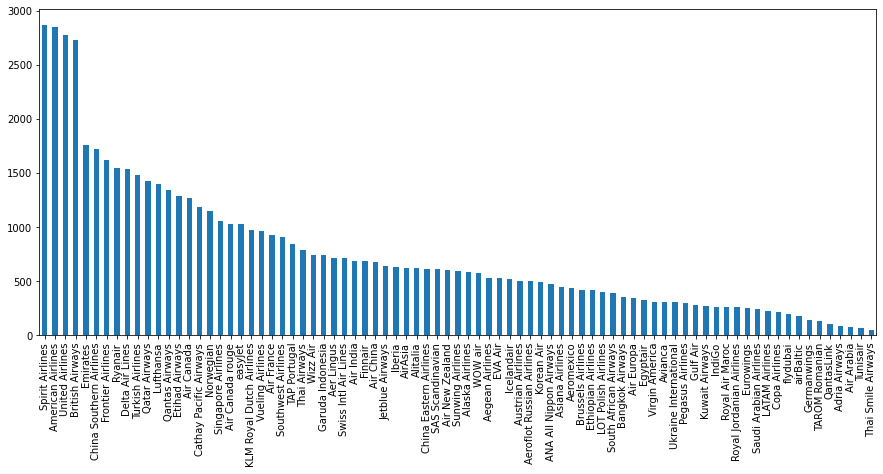

In [42]:
main_df['airline'].value_counts().plot(kind='bar',figsize=(15,6))

We can do one hot incoding to these categorical values

**Cabin**

In [36]:
main_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

**Travel Type**

In [37]:
main_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

customer review

In [43]:
main_df['customer_review'][5]

'âœ… Trip Verified | Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: "Relax Sir, No problem Sir, It\'s okay". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it\'s an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two we

### Doing One-Hot encoding to categorical features

##Model for predicting Nan value in recommened
peforming naive base classifer for fining NaN values in the recommender column

In [44]:
text_df=main_df[['customer_review','recommended']]
text_df

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,yes
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no
...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no
131888,I had a good flight from London to Kiev with U...,no
131890,Kiev - London (Gatwick) in business class (in ...,no
131892,Several flights - KBP to AMS (3 times one way)...,no


In [45]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  61183 non-null  object
 1   recommended      59761 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [58]:
text_df['review_len']= text_df['customer_review'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
text_df

,customer_review,recommended,review_len
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416
...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546
131888,I had a good flight from London to Kiev with U...,no,450
131890,Kiev - London (Gatwick) in business class (in ...,no,1531
131892,Several flights - KBP to AMS (3 times one way)...,no,772


##Box plot

In [60]:
GN= text_df.groupby('recommended')

no


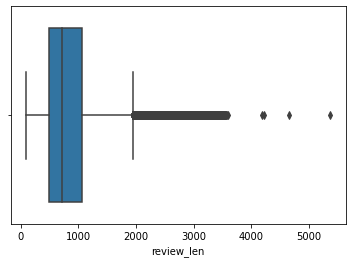

yes


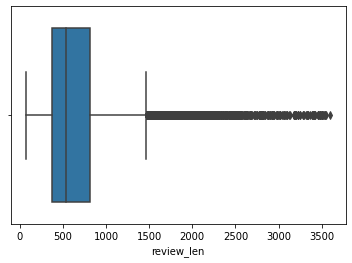

In [63]:
for name , name_df in GN:
  print(name)
  sns.boxplot(x='review_len',data= name_df)
  plt.show()

From above boxplot we can conclude that as the length of text increases the recommended value will be no

###Text Processesing  

In [64]:
import re
import nltk


In [65]:
from nltk.corpus import stopwords

In [66]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [68]:
stop_words=stopwords.words('english')

In [69]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [70]:
def text_cleaning(data):

  #remove all special character
  processed_feature = re.sub(r'\W', ' ', str(data))

  # remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  # Remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  # removing stopword
  processed_feature = processed_feature.split(' ')
  processed_feature = [lemmatizer.lemmatize(i) for i in processed_feature]
  processed_feature = ' '.join([i for i in processed_feature if i not in stop_words])

  return processed_feature

    
  

In [71]:
text_df['tokenized_mess'] = text_df['customer_review'].apply(text_cleaning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
text_df

,customer_review,recommended,review_len,tokenized_mess
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143,âœ trip verified london izmir via istanbul fir...
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467,âœ trip verified istanbul bucharest make check...
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648,âœ trip verified rome prishtina via istanbul f...
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955,âœ trip verified flew turkish airline iad ist ...
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416,âœ trip verified mumbai dublin via istanbul ne...
...,...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546,two domestic flight kiev lviv last week troubl...
131888,I had a good flight from London to Kiev with U...,no,450,good flight london kiev ukraine international ...
131890,Kiev - London (Gatwick) in business class (in ...,no,1531,kiev london gatwick business class april flown...
131892,Several flights - KBP to AMS (3 times one way)...,no,772,several flight kbp 3 time one way lgw zrh twic...


Seprating NaN and Non Nan values in recommender columns

In [73]:
text_df_1 = text_df.dropna() 

In [74]:
text_df_2 = text_df[text_df['recommended'].isna()]


Creating Testing and training dataset

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_df_1['tokenized_mess'],text_df_1['recommended'],test_size=0.25)

### TF-idf vectorization

In [77]:
# there are more than 10K features 
# setting max_features to 7500 for system performance 
vectorization = TfidfVectorizer(max_features=7500,min_df=7,max_df=0.8)

In [78]:
X_train = vectorization.fit_transform(X_train).toarray()
X_test = vectorization.transform(X_test).toarray()

In [ ]:
len(vectorization.get_feature_names())

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


Applying Gaussian naive bayes

In [80]:
GNB  = GaussianNB().fit(X_train,y_train)

In [81]:
y_train_pred_gnb = GNB.predict(X_train)
y_test_pred_gnb = GNB.predict(X_test)

Applying Multinomial Naive bayes

In [82]:
MNB = MultinomialNB().fit(X_train,y_train)

In [83]:
y_train_pred_mnb = MNB.predict(X_train)
y_test_pred_mnb = MNB.predict(X_test)

Applying Bernoulli Naive bayes

In [84]:
BNB = BernoulliNB().fit(X_train,y_train)

In [85]:
y_train_pred_bnb = BNB.predict(X_train)
y_test_pred_bnb = BNB.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(y_train,y_train_pred_gnb))
print(confusion_matrix(y_test,y_test_pred_gnb))

[[18460  5158]
 [ 2420 18782]]
[[5770 1880]
 [1102 6189]]


In [88]:
print(classification_report(y_train,y_train_pred_gnb))
print("\n")
print(classification_report(y_test,y_test_pred_gnb))

              precision    recall  f1-score   support

          no       0.88      0.78      0.83     23618
         yes       0.78      0.89      0.83     21202

    accuracy                           0.83     44820
   macro avg       0.83      0.83      0.83     44820
weighted avg       0.84      0.83      0.83     44820



              precision    recall  f1-score   support

          no       0.84      0.75      0.79      7650
         yes       0.77      0.85      0.81      7291

    accuracy                           0.80     14941
   macro avg       0.80      0.80      0.80     14941
weighted avg       0.80      0.80      0.80     14941



In [89]:
print(classification_report(y_train,y_train_pred_mnb))
print("\n")
print(classification_report(y_test,y_test_pred_mnb))

              precision    recall  f1-score   support

          no       0.88      0.85      0.86     23618
         yes       0.84      0.88      0.86     21202

    accuracy                           0.86     44820
   macro avg       0.86      0.86      0.86     44820
weighted avg       0.86      0.86      0.86     44820



              precision    recall  f1-score   support

          no       0.88      0.84      0.86      7650
         yes       0.84      0.88      0.86      7291

    accuracy                           0.86     14941
   macro avg       0.86      0.86      0.86     14941
weighted avg       0.86      0.86      0.86     14941



In [90]:
print(classification_report(y_train,y_train_pred_bnb))
print("\n")
print(classification_report(y_test,y_test_pred_bnb))

              precision    recall  f1-score   support

          no       0.90      0.79      0.84     23618
         yes       0.80      0.90      0.84     21202

    accuracy                           0.84     44820
   macro avg       0.85      0.85      0.84     44820
weighted avg       0.85      0.84      0.84     44820



              precision    recall  f1-score   support

          no       0.89      0.79      0.84      7650
         yes       0.81      0.90      0.85      7291

    accuracy                           0.85     14941
   macro avg       0.85      0.85      0.85     14941
weighted avg       0.85      0.85      0.84     14941



In above code we see that multinomial is performing best in all naive bayes classifier

With the help of this classifier lets try to find the NaN values of recommender columns.

In [91]:
X_new= vectorization.transform(text_df_2['tokenized_mess']).toarray()

In [92]:
text_df_2['recommended']=  MNB.predict(X_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
text_df_2

,customer_review,recommended,review_len,tokenized_mess
65,âœ… Trip Verified | Lagos to Istanbul via Kath...,no,629,âœ trip verified lagos istanbul via kathmandu ...
153,âœ… Trip Verified | Seychelles to Birmingham v...,no,469,âœ trip verified seychelles birmingham via ist...
209,âœ… Trip Verified | London to Bangkok via Ista...,yes,213,âœ trip verified london bangkok via istanbul l...
211,âœ… Trip Verified | At check-in in Johannesbur...,no,803,âœ trip verified check johannesburg wa told co...
261,âœ… Trip Verified | San Francisco to Mashhad v...,no,527,âœ trip verified san francisco mashhad via ist...
...,...,...,...,...
131460,âœ… Trip Verified | Kiev to Riga. 24 hrs befor...,no,1437,âœ trip verified kiev riga 24 hr flight got no...
131554,âœ… Verified Review | Flew Ukraine Internation...,no,1375,âœ verified review flew ukraine international ...
131648,We travelled Ukraine International from London...,no,1431,travelled ukraine international london gatwick...
131726,DXB-KBP-LGW. Both planes were 737-800s but the...,yes,411,dxb kbp lgw plane 737 800s seating wa identica...
